In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_gen_vs_avg_min_two_folders(folder1, folder2, label1='Folder 1', label2='Folder 2', agg='mean'):

    def load_stats(folder):
        gen_min_list = []
        for filename in os.listdir(folder):
            if filename.endswith(".csv"):
                file_path = os.path.join(folder, filename)
                try:
                    df = pd.read_csv(file_path, sep='\t')
                    if {'gen', 'max'}.issubset(df.columns):
                        gen_min_list.append(df[['gen', 'max']])
                    else:
                        print(f"Skipping {filename} in {folder}: Missing 'gen' or 'min' column.")
                except Exception as e:
                    print(f"Error reading {filename} in {folder}: {e}")
        if not gen_min_list:
            return None
        combined = pd.concat(gen_min_list)
        stats = combined.groupby('gen')['max'].agg([agg, 'std']).reset_index()
        return stats

    stats1 = load_stats(folder1)
    stats2 = load_stats(folder2)

    if stats1 is None and stats2 is None:
        print("No valid data found in either folder.")
        return

    # Plotting
    plt.figure(figsize=(10, 6))

    if stats1 is not None:
        plt.plot(stats1['gen'], stats1['mean'], label=label1, color='blue', marker='.')
        # plt.fill_between(
        #     stats1['gen'],
        #     stats1['mean'] - stats1['std'],
        #     stats1['mean'] + stats1['std'],
        #     color='blue',
        #     alpha=0.3,
        #     label=f'{label1} ±1 Std Dev'
        # )

    if stats2 is not None:
        plt.plot(stats2['gen'], stats2['mean'], label=label2, color='orange', marker='.')
        # plt.fill_between(
        #     stats2['gen'],
        #     stats2['mean'] - stats2['std'],
        #     stats2['mean'] + stats2['std'],
        #     color='orange',
        #     alpha=0.05,
        #     label=f'{label2} ±1 Std Dev'
        # )

    plt.title("Generation vs Average Min (with Std Dev)")
    plt.xlabel("Generation")
    plt.ylabel("Min Value")
    # plt.ylim(0, 2)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


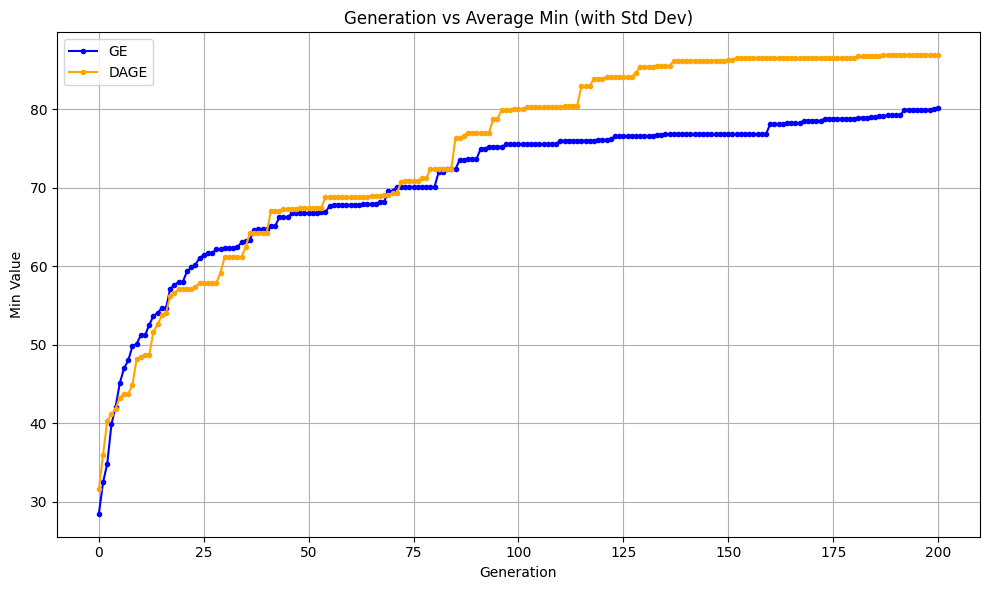

In [44]:
# this one is after applying pernty for extra movment
plot_gen_vs_avg_min_two_folders("GE", "DAGE", label1="GE", label2="DAGE")

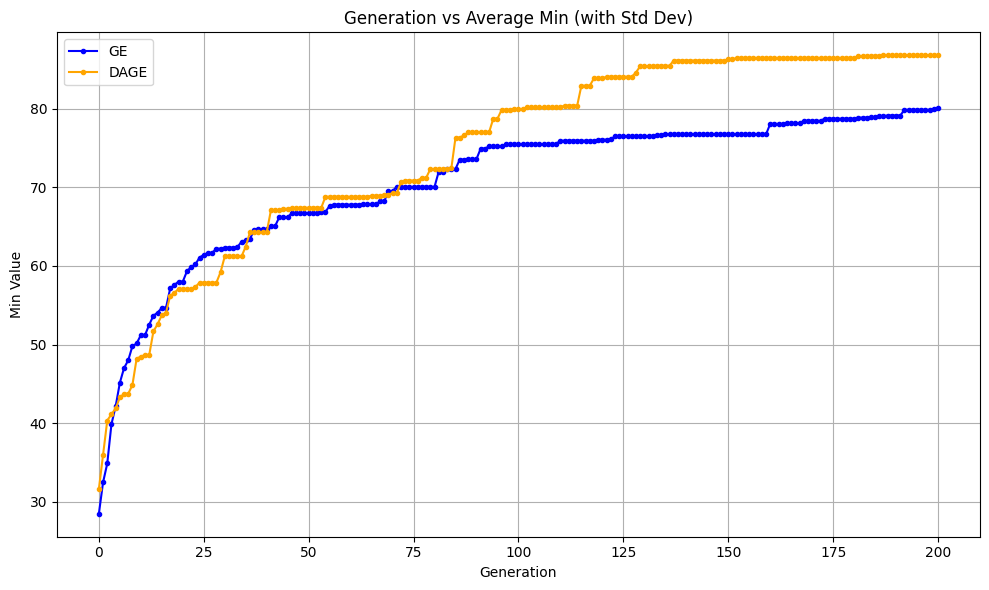

In [47]:
plot_gen_vs_avg_min_two_folders("GE_200_gen", "DAGE_200_gen", label1="GE", label2="DAGE")

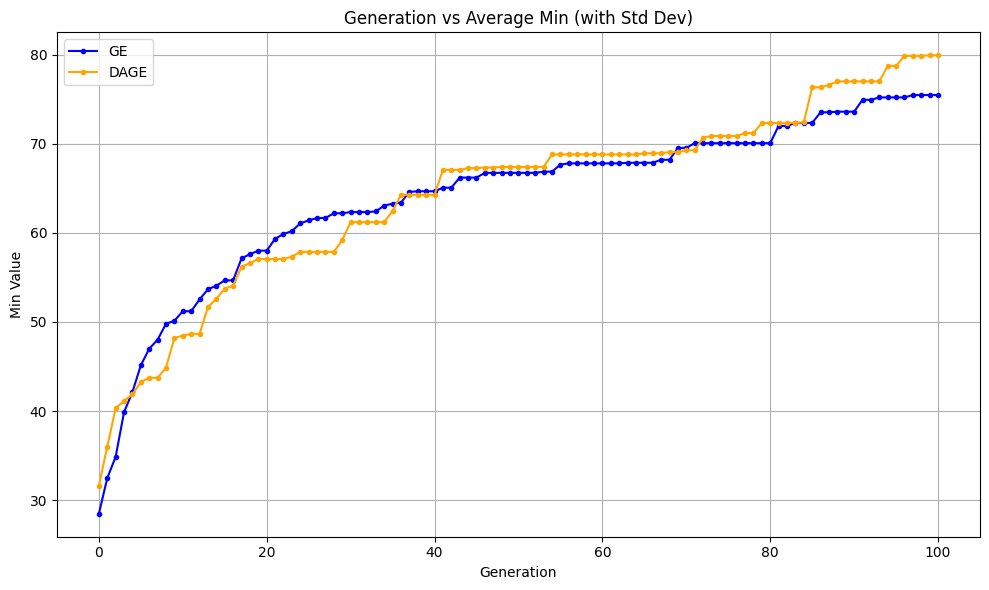

In [48]:
plot_gen_vs_avg_min_two_folders("GE_100_gen", "DAGE_100_gen", label1="GE", label2="DAGE")

In [2]:
import pickle
import statistics

with open(r"GP/max_moves.pkl", "rb") as input_file:
    max_moves_o = pickle.load(input_file)

max_moves = [i for i in max_moves_o if i < 600]   
print(max_moves_o)
print(max_moves)
print(statistics.mean(max_moves))
print(min(max_moves))
print(statistics.stdev(max_moves_o))

[600, 600, 600, 600, 420, 600, 600, 522, 600, 594, 574, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600]
[420, 522, 594, 574]
527.5
420
35.42484354559502


In [129]:
with open(r"DAGE_testing/max_moves.pkl", "rb") as input_file:
    max_moves_o = pickle.load(input_file)

max_moves = [i for i in max_moves_o if i < 600]   
print(max_moves_o)
print(max_moves)
print(statistics.mean(max_moves))
print(min(max_moves))
print(statistics.stdev(max_moves_o))

[586, 568, 564, 600, 600, 600, 600, 600, 600, 504, 600, 600, 600, 584, 600, 544, 600, 552, 586, 600, 538, 600, 600, 600, 522, 600, 600, 600, 600, 592]
[586, 568, 564, 504, 584, 544, 552, 586, 538, 522, 592]
558.1818181818181
504
26.628133078839152


In [130]:
with open(r"DAGE/max_moves.pkl", "rb") as input_file:
    max_moves_o = pickle.load(input_file)

max_moves = [i for i in max_moves_o if i < 600]   
print(max_moves_o)
print(max_moves)
print(statistics.mean(max_moves))
print(min(max_moves))
print(statistics.stdev(max_moves_o))

[600, 600, 588, 600, 558, 600, 586, 600, 508, 600, 600, 546, 600, 600, 596, 596, 562, 600, 592, 512, 530, 508, 542, 600, 600, 506, 592, 600, 530, 600]
[588, 558, 586, 508, 546, 596, 596, 562, 592, 512, 530, 508, 542, 506, 592, 530]
553.25
506
34.564216430743286


In [131]:
with open(r"DAGE/max_moves.pkl", "rb") as input_file:
    max_moves_o = pickle.load(input_file)

max_moves = [i for i in max_moves_o if i < 600]   
print(max_moves_o)
print(max_moves)
print(statistics.mean(max_moves))
print(min(max_moves))
print(statistics.stdev(max_moves_o))

[600, 600, 588, 600, 558, 600, 586, 600, 508, 600, 600, 546, 600, 600, 596, 596, 562, 600, 592, 512, 530, 508, 542, 600, 600, 506, 592, 600, 530, 600]
[588, 558, 586, 508, 546, 596, 596, 562, 592, 512, 530, 508, 542, 506, 592, 530]
553.25
506
34.564216430743286


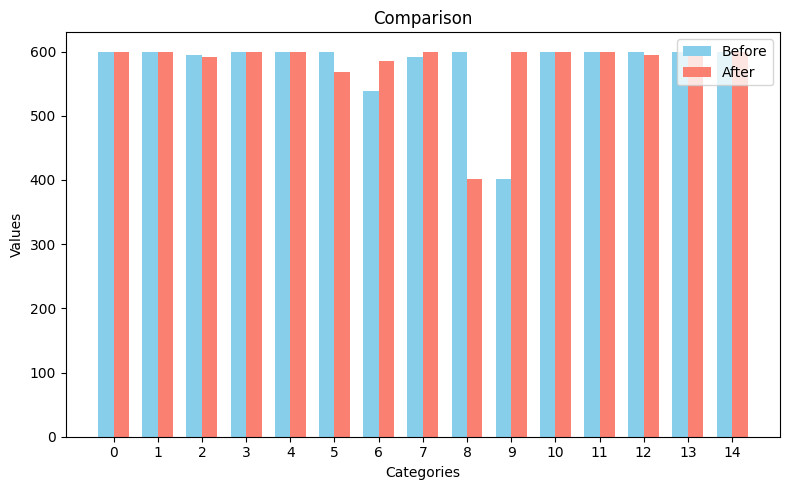

In [132]:
l_1= [600, 600, 594, 600, 600, 600, 538, 592, 600, 402, 600, 600, 600, 600, 600]
l_2 = [600, 600, 592, 600, 600, 568, 586, 600, 402, 600, 600, 600, 594, 600, 600]

import matplotlib.pyplot as plt
import numpy as np

def grouped_bar_plot(categories, values1, values2, label1='Set 1', label2='Set 2', title='Grouped Bar Plot'):
    x = np.arange(len(categories))  # positions for groups
    width = 0.35  # width of the bars

    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, values1, width, label=label1, color='skyblue')
    plt.bar(x + width/2, values2, width, label=label2, color='salmon')

    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title(title)
    plt.xticks(x, categories)
    plt.legend()
    plt.tight_layout()
    plt.show()

grouped_bar_plot(range(len(l_1)), l_1, l_2, label1='Before', label2='After', title='Comparison')

### Analyse the best phenotype and the average wasted moves

In [133]:
from deap import gp

def progn(*args):
    for arg in args:
        arg()

def prog2(out1, out2):
    return partial(progn,out1,out2)

def prog3(out1, out2, out3):
    return partial(progn,out1,out2,out3)

def if_then_else(condition, out1, out2):
    out1() if condition() else out2()



In [134]:
import copy
from functools import partial

import pickle
import statistics


class AntSimulator(object):
    direction = ["north", "east", "south", "west"]
    dir_row = [1, 0, -1, 0]
    dir_col = [0, 1, 0, -1]

    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.eaten = 0
        self.routine = None
        self.food_move = 0
        self.last_turn = None
        self.redundant_turns = 0

    def _reset(self):
        self.row = self.row_start
        self.col = self.col_start
        self.dir = 1
        self.moves = 0
        self.eaten = 0
        self.matrix_exc = copy.deepcopy(self.matrix)
        self.food_move = 0
        self.last_turn = None
        self.redundant_turns = 0

    def count_food(self):
        return sum(row.count("food") for row in self.matrix)

    @property
    def position(self):
        return (self.row, self.col, self.direction[self.dir])
    
    def turn_left(self):
        if self.moves < self.max_moves:
            if self.eaten < self.total_food:
                self.food_move += 1
            self.moves += 1
            if self.last_turn == "right":
                self.redundant_turns += 1
            self.last_turn = "left"
            self.dir = (self.dir - 1) % 4

    def turn_right(self):
        if self.moves < self.max_moves:
            if self.eaten < self.total_food:
                self.food_move += 1
            self.moves += 1
            if self.last_turn == "left":
                self.redundant_turns += 1
            self.last_turn = "right"
            self.dir = (self.dir + 1) % 4

    def move_forward(self):
        if self.moves < self.max_moves:
            if self.eaten < self.total_food:
                self.food_move += 1
            self.moves += 1
            self.last_turn = "move_forward"
            self.row = (self.row + self.dir_row[self.dir]) % self.matrix_row
            self.col = (self.col + self.dir_col[self.dir]) % self.matrix_col
            if self.matrix_exc[self.row][self.col] == "food":
                self.eaten += 1
            self.matrix_exc[self.row][self.col] = "passed"
    

    def sense_food(self):
        self.last_turn = "sense_food"
        ahead_row = (self.row + self.dir_row[self.dir]) % self.matrix_row
        ahead_col = (self.col + self.dir_col[self.dir]) % self.matrix_col
        return self.matrix_exc[ahead_row][ahead_col] == "food"

    def if_food_ahead(self, out1, out2):
        return partial(if_then_else, self.sense_food, out1, out2)

    def run(self, routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()

    def parse_matrix(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())
            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("food")
                elif col == ".":
                    self.matrix[-1].append("empty")
                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.dir = 1
        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)
        self.total_food = self.count_food()


        
ant = AntSimulator(600)

with  open("./../santafe_trail.txt") as trail_file:
      ant.parse_matrix(trail_file)
      
pset = gp.PrimitiveSet("MAIN", 0)
pset.addPrimitive(ant.if_food_ahead, 2)
pset.addPrimitive(prog2, 2)
pset.addPrimitive(prog3, 3)
pset.addTerminal(ant.move_forward)
pset.addTerminal(ant.turn_left)
pset.addTerminal(ant.turn_right)
      
      
def run_for_one_phenotype(phenotype, ant, pset):
    routine = gp.compile(phenotype, pset)
    ant.run(routine)
    return ant.redundant_turns, ant.eaten

def average_redundant_turns(phenotype_list, ant, pset):
    redundant_turns = []
    food_ate_list = []
    for i in phenotype_list:
        turn, eaten = run_for_one_phenotype(i, ant, pset)
        redundant_turns.append(turn)
        food_ate_list.append(eaten)
    mean_redundant_turn = statistics.mean(redundant_turns)
    stdev_redundant_turn = statistics.stdev(redundant_turns)
    
    print(food_ate_list)
    print(redundant_turns)
    
    redundant_turn_when_perfect_score= []
    for i in range(len(food_ate_list)):
        if food_ate_list[i]==89:
            redundant_turn_when_perfect_score.append(redundant_turns[i])
    
    print(redundant_turn_when_perfect_score)
    mean_redundant_turn_when_perfect_score = statistics.mean(redundant_turn_when_perfect_score)
    stdev_redundant_turn_when_perfect_score = statistics.stdev(redundant_turn_when_perfect_score)
    
    return mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score
    

In [135]:

with open(r"GE/best_phenotype_each_run.pkl", "rb") as input_file:
    phenotype_list = pickle.load(input_file)

mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score = average_redundant_turns(phenotype_list, ant, pset)
mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score

[61, 74, 70, 70, 89, 53, 66, 89, 67, 66, 67, 68, 70, 73, 70, 56, 71, 69, 89, 89, 72, 89, 72, 89, 89, 67, 72, 71, 89, 89]
[0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 12, 0, 28, 0, 0, 11, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0, 33]
[0, 0, 11, 0, 0, 0, 78, 0, 33]


(5.833333333333333, 15.941884398054063, 13.555555555555555, 26.55235917536854)

In [136]:

with open(r"DAGE_testing/best_phenotype_each_run.pkl", "rb") as input_file:
    phenotype_list = pickle.load(input_file)

mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score = average_redundant_turns(phenotype_list, ant, pset)
mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score

[89, 89, 89, 65, 80, 80, 72, 68, 74, 89, 61, 67, 73, 89, 61, 89, 71, 89, 89, 76, 89, 68, 69, 68, 89, 64, 71, 76, 71, 89]
[11, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 12, 0, 0, 0, 11, 7, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0, 0, 12, 11, 0]


(1.8666666666666667, 3.96304770680808, 3.090909090909091, 5.300085762599421)

In [146]:
import copy
from functools import partial

import pickle
import statistics


class AntSimulator(object):
    direction = ["north", "east", "south", "west"]
    dir_row = [1, 0, -1, 0]
    dir_col = [0, 1, 0, -1]

    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.eaten = 0
        self.routine = None
        self.food_move = 0
        self.last_turn = None
        self.redundant_turns = 0

    def _reset(self):
        self.row = self.row_start
        self.col = self.col_start
        self.dir = 1
        self.moves = 0
        self.eaten = 0
        self.matrix_exc = copy.deepcopy(self.matrix)
        self.food_move = 0
        self.last_turn = None
        self.redundant_turns = 0

    def count_food(self):
        return sum(row.count("food") for row in self.matrix)

    @property
    def position(self):
        return (self.row, self.col, self.direction[self.dir])
    
    def turn_left(self):
        if self.moves < self.max_moves:
            if self.eaten < self.total_food:
                self.food_move += 1
            self.moves += 1
            if self.last_turn == "left":
                self.redundant_turns += 1
            self.last_turn = "left"
            self.dir = (self.dir - 1) % 4

    def turn_right(self):
        if self.moves < self.max_moves:
            if self.eaten < self.total_food:
                self.food_move += 1
            self.moves += 1
            if self.last_turn == "right":
                self.redundant_turns += 1
            self.last_turn = "right"
            self.dir = (self.dir + 1) % 4

    def move_forward(self):
        if self.moves < self.max_moves:
            if self.eaten < self.total_food:
                self.food_move += 1
            self.moves += 1
            self.last_turn = "move_forward"
            self.row = (self.row + self.dir_row[self.dir]) % self.matrix_row
            self.col = (self.col + self.dir_col[self.dir]) % self.matrix_col
            if self.matrix_exc[self.row][self.col] == "food":
                self.eaten += 1
            self.matrix_exc[self.row][self.col] = "passed"
    

    def sense_food(self):
        self.last_turn = "sense_food"
        ahead_row = (self.row + self.dir_row[self.dir]) % self.matrix_row
        ahead_col = (self.col + self.dir_col[self.dir]) % self.matrix_col
        return self.matrix_exc[ahead_row][ahead_col] == "food"

    def if_food_ahead(self, out1, out2):
        return partial(if_then_else, self.sense_food, out1, out2)

    def run(self, routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()

    def parse_matrix(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())
            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("food")
                elif col == ".":
                    self.matrix[-1].append("empty")
                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.dir = 1
        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)
        self.total_food = self.count_food()


        
ant = AntSimulator(600)

with  open("./../santafe_trail.txt") as trail_file:
      ant.parse_matrix(trail_file)
      
pset = gp.PrimitiveSet("MAIN", 0)
pset.addPrimitive(ant.if_food_ahead, 2)
pset.addPrimitive(prog2, 2)
pset.addPrimitive(prog3, 3)
pset.addTerminal(ant.move_forward)
pset.addTerminal(ant.turn_left)
pset.addTerminal(ant.turn_right)
      
      
def run_for_one_phenotype(phenotype, ant, pset):
    routine = gp.compile(phenotype, pset)
    ant.run(routine)
    return ant.redundant_turns, ant.eaten

def average_redundant_turns(phenotype_list, ant, pset):
    redundant_turns = []
    food_ate_list = []
    for i in phenotype_list:
        turn, eaten = run_for_one_phenotype(i, ant, pset)
        redundant_turns.append(turn)
        food_ate_list.append(eaten)
    mean_redundant_turn = statistics.mean(redundant_turns)
    stdev_redundant_turn = statistics.stdev(redundant_turns)
    
    print(food_ate_list)
    print(redundant_turns)
    
    redundant_turn_when_perfect_score= []
    for i in range(len(food_ate_list)):
        if food_ate_list[i]==89:
            redundant_turn_when_perfect_score.append(redundant_turns[i])
    
    print(redundant_turn_when_perfect_score)
    mean_redundant_turn_when_perfect_score = statistics.mean(redundant_turn_when_perfect_score)
    stdev_redundant_turn_when_perfect_score = statistics.stdev(redundant_turn_when_perfect_score)
    
    return mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score
    

In [147]:

with open(r"GE/best_phenotype_each_run.pkl", "rb") as input_file:
    phenotype_list = pickle.load(input_file)

mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score = average_redundant_turns(phenotype_list, ant, pset)
mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score

[61, 74, 70, 70, 89, 53, 66, 89, 67, 66, 67, 68, 70, 73, 70, 56, 71, 69, 89, 89, 72, 89, 72, 89, 89, 67, 72, 71, 89, 89]
[7, 0, 0, 0, 113, 26, 0, 0, 0, 0, 0, 0, 0, 5, 0, 7, 0, 0, 111, 111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 96]
[113, 0, 111, 111, 0, 0, 0, 0, 96]


(15.866666666666667, 37.08027948164336, 47.888888888888886, 56.99439543596468)

In [148]:
with open(r"DAGE/best_phenotype_each_run.pkl", "rb") as input_file:
    phenotype_list = pickle.load(input_file)

mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score = average_redundant_turns(phenotype_list, ant, pset)

mean_redundant_turn, stdev_redundant_turn, mean_redundant_turn_when_perfect_score, stdev_redundant_turn_when_perfect_score

[62, 67, 89, 88, 89, 60, 89, 88, 89, 84, 85, 89, 88, 59, 89, 89, 89, 84, 89, 89, 89, 89, 89, 59, 62, 89, 89, 61, 89, 88]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 103, 0, 0, 0, 0, 0, 0, 0]


(3.433333333333333, 18.805141141010704, 6.4375, 25.75)